In [33]:
import pandas as pd
import os
import numpy as np
import joblib
from functools import reduce
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import shap
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
# from skmultilearn.model_selection import MultiLabelStratifiedKFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from joblib import dump
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
# breed
feat_breed = pd.read_pickle('../features/breed.pkl')
feat_breed_v2 = pd.read_pickle('../features/breed_v2.pkl')

feat_breed_top50 = pd.read_pickle('../features/breed_top50.pkl')
feat_breed_top50_v2 = pd.read_pickle('../features/breed_top50_v2.pkl')

feat_breed_group = pd.read_pickle('../features/breed_group.pkl')
feat_sub_breed = pd.read_pickle('../features/sub_breed.pkl')
feat_breed_type = pd.read_pickle('../features/breed_type.pkl')

feat_breed_pure_or_mix = pd.read_pickle('../features/breed_pure_or_mix.pkl')

# age
feat_age = pd.read_csv('../features/age_with_id.csv')

# sex
feat_sex = pd.read_csv('../features/one_hot_encoded_sex_with_id.csv')

# weight
feat_weight = pd.read_pickle('../features/weight.pkl')

# Climate
# feat_HotWheater = pd.read_csv('../features/one_hot_encoded_HotWheater_with_id.csv')
# feat_ModerateWheather = pd.read_csv('../features/one_hot_encoded_ModerateWheather_with_id.csv')
# feat_ColdWheater_with_id = pd.read_csv('../features/one_hot_encoded_ColdWheater_with_id.csv')
feat_cold_month = pd.read_pickle('../features/ColdMonths.pkl')
feat_hot_month = pd.read_pickle('../features/HotMonths.pkl')

# Diet
feat_diet = pd.read_pickle('../features/diet.pkl') # 5 columns

# Physical Activity
feat_pa_total_hours = pd.read_csv('../features/PhysicalActivity_total_hours.csv')
feat_pa_surface = pd.read_csv('../features/PhysicalActivity_surface.csv')
feat_pa_wheather = pd.read_csv('../features/PhysicalActivity_wheather.csv')

# Owner Demographics
feat_od_income = pd.read_pickle('../features/od_income.pkl')
feat_od_education = pd.read_pickle('../features/od_education.pkl')

# Residentual
feat_prim_census_division = pd.read_pickle('../features/primary_residence_census_division.pkl')

# disease
feat_disease_input = pd.read_csv('../features/one_hot_encoded_disease_input.csv')
feat_disease_output_binary = pd.read_csv('../features/disease_output_binary.csv')
feat_disease_output = pd.read_csv('../features/disease_output.csv')

# age_condition
feat_age_condition = pd.read_pickle('../features/age_condition.pkl')
feat_age_condition_type = pd.read_pickle('../features/age_condition_type.pkl')


features_list = [

    # breed
    #feat_breed,
    #feat_breed_v2,
    #feat_breed_top50,
    #feat_breed_top50_v2,
    #feat_breed_group,
    #feat_sub_breed,
    #feat_breed_type,
    #feat_breed_pure_or_mix,

    # age
    #feat_age,   # 24881 dog_ids

    # sex
    #feat_sex,

    # weight
    #feat_weight

    # diet
    #feat_diet,  # 33141 dog_ids for df_diet_consistency

    #feat_HotWheater,
    #feat_ModerateWheather,
    #feat_ColdWheater_with_id,

    # Climate
    #feat_hot_month,
    #feat_cold_month,

    # Physical Activity
    #feat_pa_total_hours,
    #feat_pa_surface,
    #feat_pa_wheather,   # 26406 dog_ids

    # Owner demographics
    #feat_od_income,    # 29096 dog_ids
    #feat_od_education

    # Residentual
    feat_prim_census_division,  # 33136 dog_ids

    # disease
    #feat_disease_input,
    #feat_disease_output_binary,
    #feat_disease_output
]

feat_age_condition_type

,dog_id,age_diagnosis_years,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Cardiac,condition_type_Ear/Nose/Throat,condition_type_Endocrine,condition_type_Eye,condition_type_Gastrointestinal,condition_type_Hematopoietic,...,condition_type_Kidney/Urinary,condition_type_Liver/Pancreas,condition_type_Mouth/Dental/Oral,condition_type_Other Congenital Disorder,condition_type_Reproductive,condition_type_Respiratory,condition_type_Skin,condition_type_Toxin Consumption,condition_type_Trauma,condition_type_cancer
0,100001,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,100001,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100001,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,100001,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100001,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910915,3373,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910929,14856,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910936,58327,6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
910945,3417,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
exp1 = []
exp2 = [feat_breed_top50_v2]
exp3 = [feat_breed_group]
exp4 = [feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix]
exp5 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age]
exp6 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex]
exp7 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_weight]
exp8 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex, feat_weight, feat_hot_month, feat_cold_month]
exp9 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
        feat_age, feat_sex, feat_weight, feat_prim_census_division]
exp10 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_weight, feat_cold_month, feat_hot_month, feat_prim_census_division]
exp11 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours]
exp12 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_diet]
exp13 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet]
exp14 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex, feat_weight,
         feat_cold_month, feat_hot_month,
         feat_prim_census_division,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet,
         feat_od_education, feat_od_income]
exp15 = [feat_breed_top50_v2, feat_breed_group, feat_breed_type, feat_sub_breed, feat_breed_pure_or_mix,
         feat_age, feat_sex,
         feat_pa_surface, feat_pa_total_hours,
         feat_diet
         ]


In [36]:
experiments = {
    'exp1': exp1,
    'exp2': exp2,
    'exp3': exp3,
    'exp4': exp4,
    'exp5': exp5,
    'exp6': exp6,
    'exp7': exp7,
    'exp8': exp8,
    'exp9': exp9,
    'exp10': exp10,
    'exp11': exp11,
    'exp12': exp12,
    'exp13': exp13,
    'exp14': exp14,
    #'exp15': exp15,
    #'exp16': exp16,
    #'exp17': exp17,
    #'exp18': exp18,
    #'exp19': exp19,
    #'exp20': exp20,
    #'exp21': exp21
}


In [37]:
exp_features = experiments['exp11']

In [38]:
# List of DataFrames to be merged
list_input_features = features_list  # Add more DataFrames as needed

# Merge DataFrames iteratively using reduce
input_features = reduce(lambda left, right: pd.merge(left, right, on='dog_id'), exp_features)

# Merge the two dataframes based on dog_id
#data = pd.merge(feat_breed_top50_v2, feat_breed_group, on='dog_id')

# Merge with disease output feature
data = pd.merge(feat_age_condition_type, input_features, on='dog_id')
data

,dog_id,age_diagnosis_years,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Cardiac,condition_type_Ear/Nose/Throat,condition_type_Endocrine,condition_type_Eye,condition_type_Gastrointestinal,condition_type_Hematopoietic,...,oc_primary_census_division__8.0,oc_primary_census_division__9.0,concrete,wood,other_hard,grass_dirt,gravel,sand,astroturf,total_active_hours
0,100001,0,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
1,100001,1,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
2,100001,2,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
3,100001,3,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
4,100001,4,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241005,77040,3,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0
241006,77040,4,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0
241007,77040,5,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0
241008,77040,6,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0


In [39]:
# Check for NaN values
rows_with_nan = data[data.isna().any(axis=1)]
columns_with_nan = data.columns[data.isna().any()].tolist()
# Display the rows with NaN values
rows_with_nan[columns_with_nan]

""


In [40]:
from joblib import load
loaded_scaler = load('../models/scaler.joblib')

# Normalize the specified features in one line and save in the same columns
features_to_normalize = ['age_diagnosis_years', 'df_diet_consistency', 'df_feedings_per_day', 'total_active_hours_y', 'pa_hot_weather_months_per_year', 'pa_cold_weather_months_per_year', 'total_active_hours_y', 'od_annual_income_range_usd']

# select features that are in data
features_to_normalize_in_data = [feature for feature in features_to_normalize if feature in data.columns]

# Initialize MinMaxScaler
# scaler = MinMaxScaler()
scaler = loaded_scaler

# Normalize
if features_to_normalize_in_data:
    data[features_to_normalize_in_data] = scaler.fit_transform(data[features_to_normalize_in_data])
    print(data[features_to_normalize_in_data])


        age_diagnosis_years  pa_hot_weather_months_per_year  \
0                      0.00                        0.166667   
1                      0.04                        0.166667   
2                      0.08                        0.166667   
3                      0.12                        0.166667   
4                      0.16                        0.166667   
...                     ...                             ...   
241005                 0.12                        0.166667   
241006                 0.16                        0.166667   
241007                 0.20                        0.166667   
241008                 0.24                        0.166667   
241009                 0.28                        0.166667   

        pa_cold_weather_months_per_year  
0                              0.083333  
1                              0.083333  
2                              0.083333  
3                              0.083333  
4                              0.

Trying to unpickle estimator MinMaxScaler from version 1.4.0 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


In [41]:
data

,dog_id,age_diagnosis_years,condition_type_Bone/Orthopedic,condition_type_Brain/Neurologic,condition_type_Cardiac,condition_type_Ear/Nose/Throat,condition_type_Endocrine,condition_type_Eye,condition_type_Gastrointestinal,condition_type_Hematopoietic,...,oc_primary_census_division__8.0,oc_primary_census_division__9.0,concrete,wood,other_hard,grass_dirt,gravel,sand,astroturf,total_active_hours
0,100001,0.00,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
1,100001,0.04,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
2,100001,0.08,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
3,100001,0.12,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
4,100001,0.16,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,False,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241005,77040,0.12,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0
241006,77040,0.16,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0
241007,77040,0.20,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0
241008,77040,0.24,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,2.0


In [42]:
# Separate features and labels
X = data.drop(['dog_id'] + ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
]], axis=1)

y_columns = ['condition_type_' + condition_type for condition_type in [
    'Eye', 'Ear/Nose/Throat', 'Mouth/Dental/Oral', 'Skin', 'Cardiac', 'Respiratory',
    'Gastrointestinal', 'Liver/Pancreas', 'Kidney/Urinary', 'Reproductive', 'Bone/Orthopedic',
    'Brain/Neurologic', 'Endocrine', 'Hematopoietic', 'Other Congenital Disorder',
    'Infection/Parasites', 'Toxin Consumption', 'Trauma', 'Immune-mediated', 'cancer'
]]
y = data[y_columns]

# Convert y to a binary format
y_binary = (y == 1)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[21:16:44] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:17:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:17:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

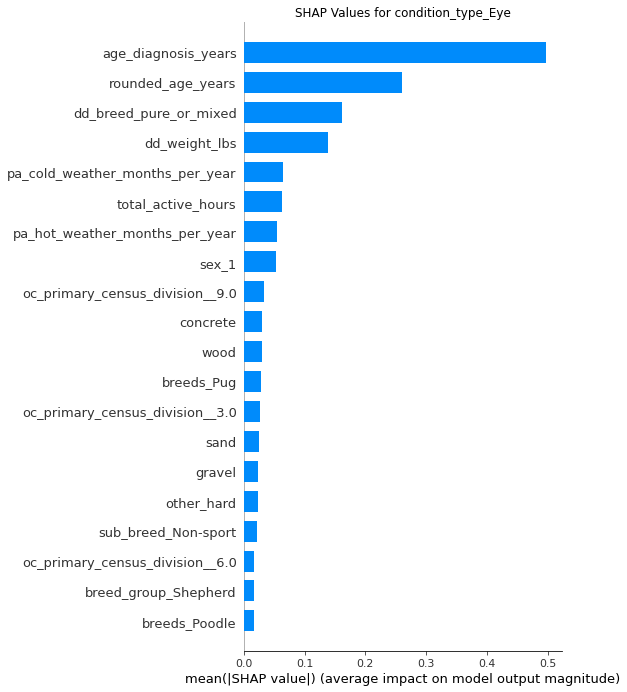

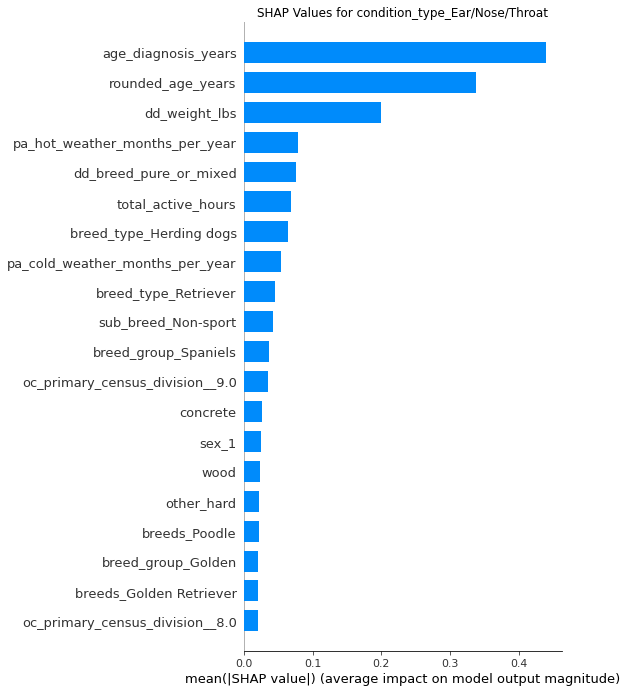

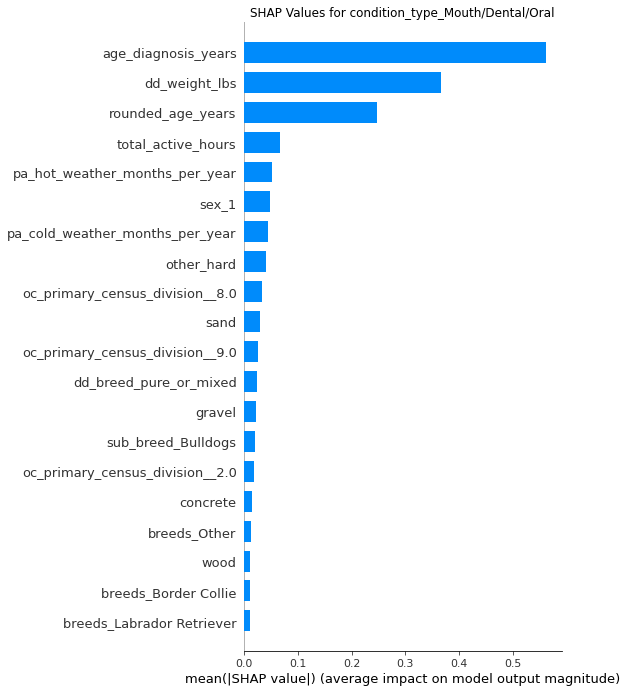

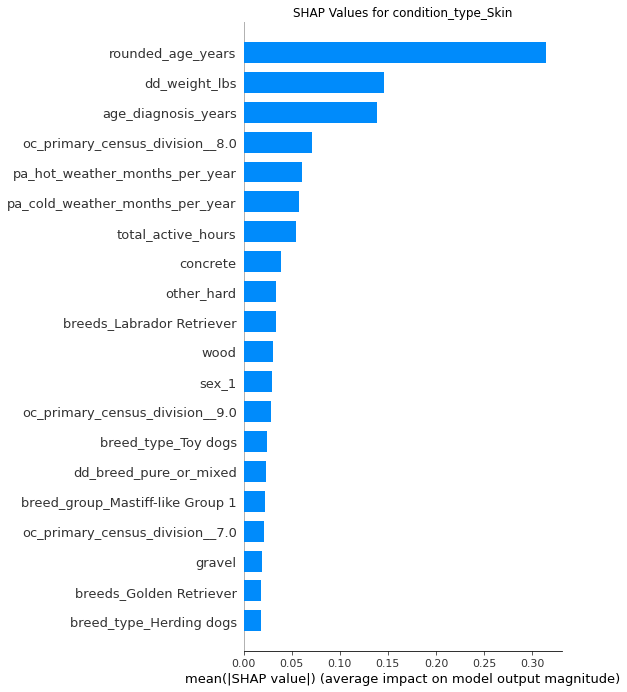

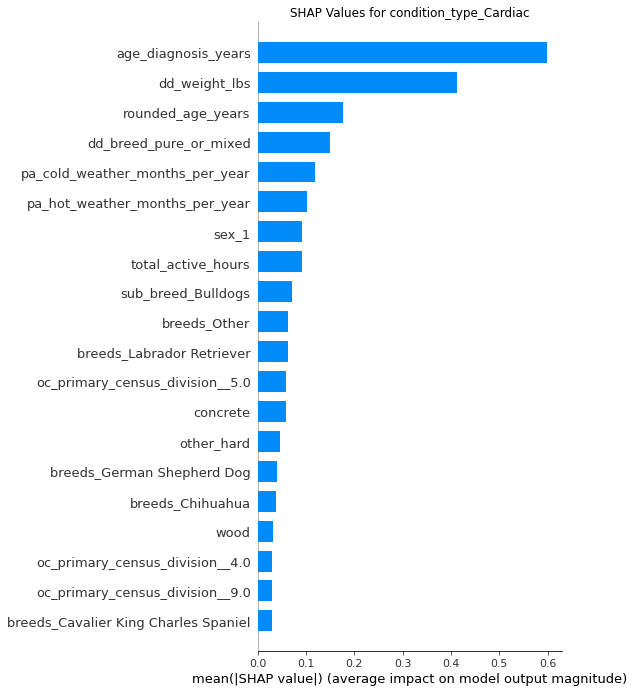

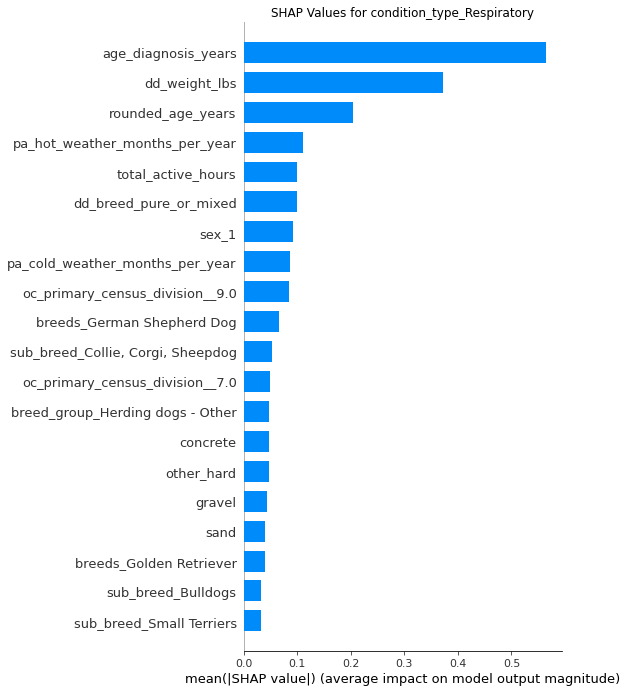

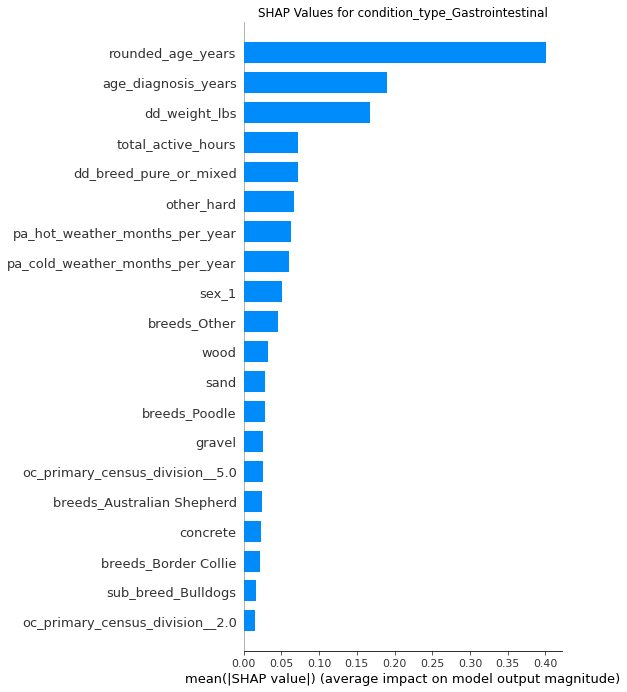

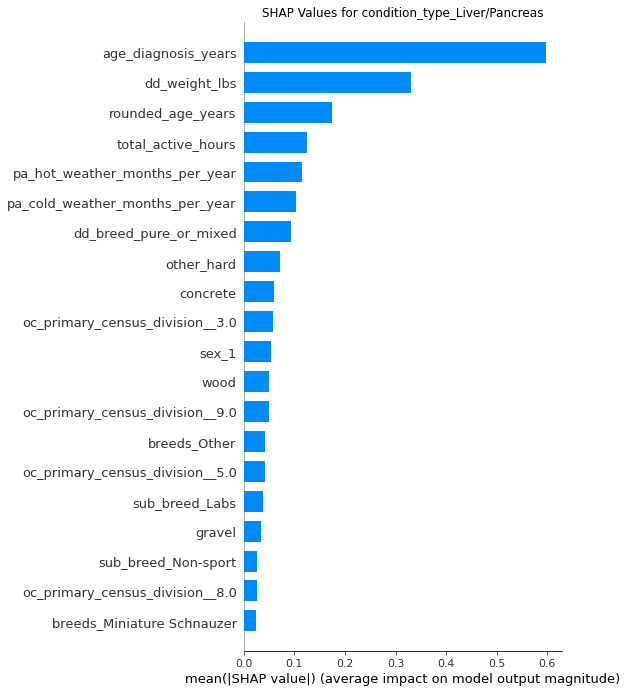

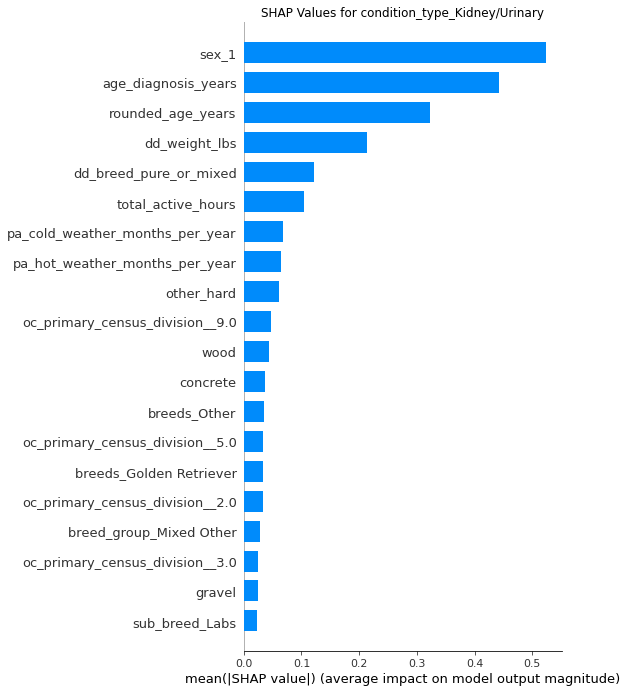

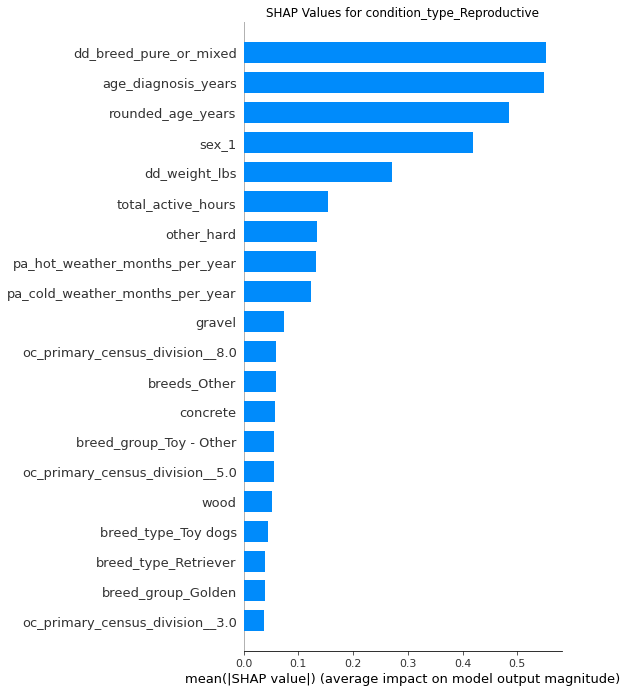

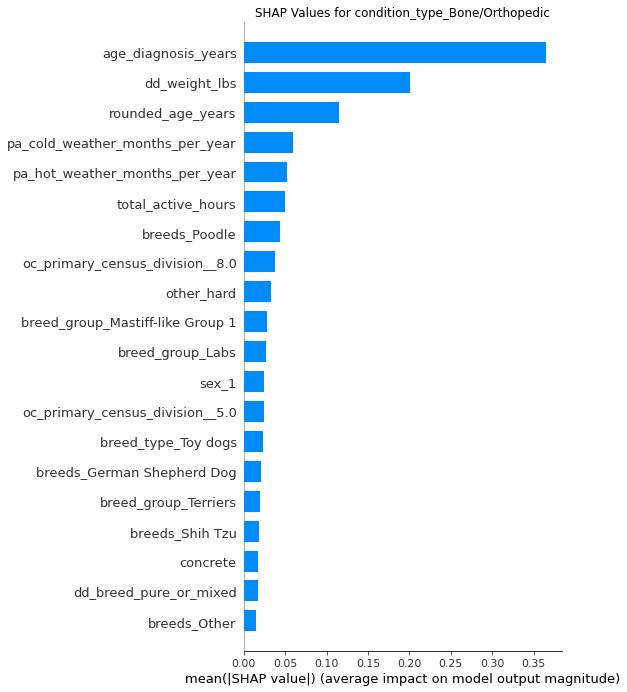

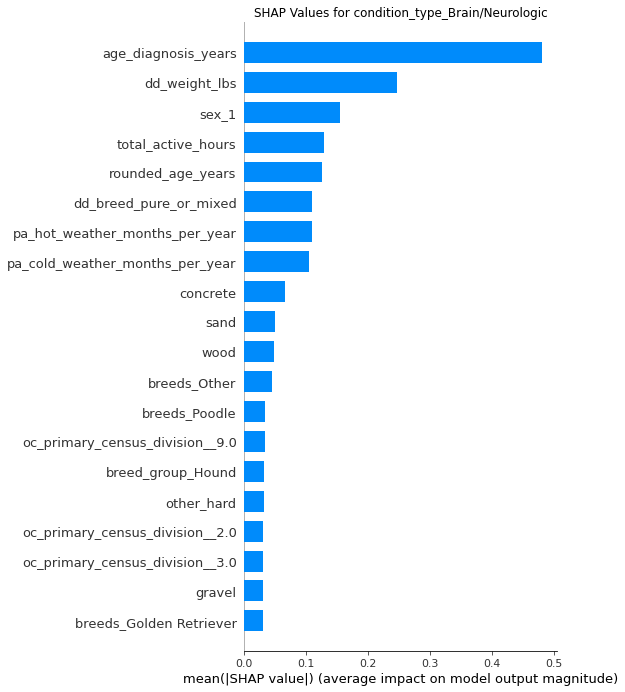

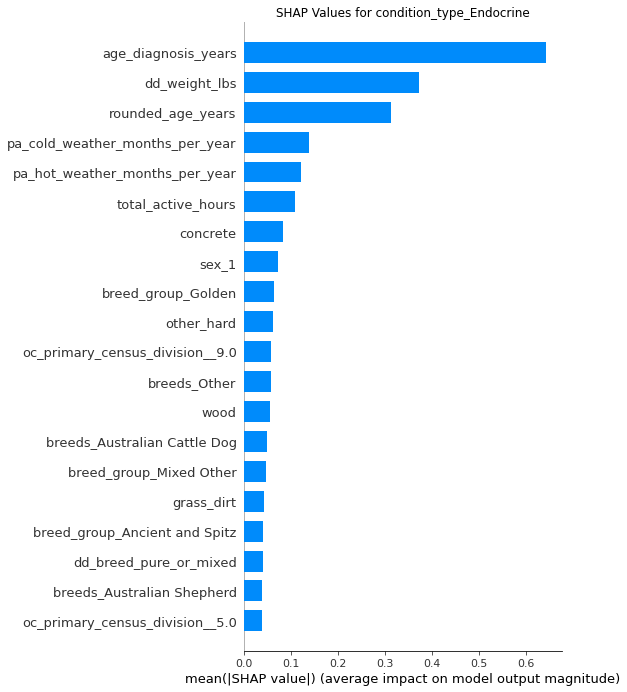

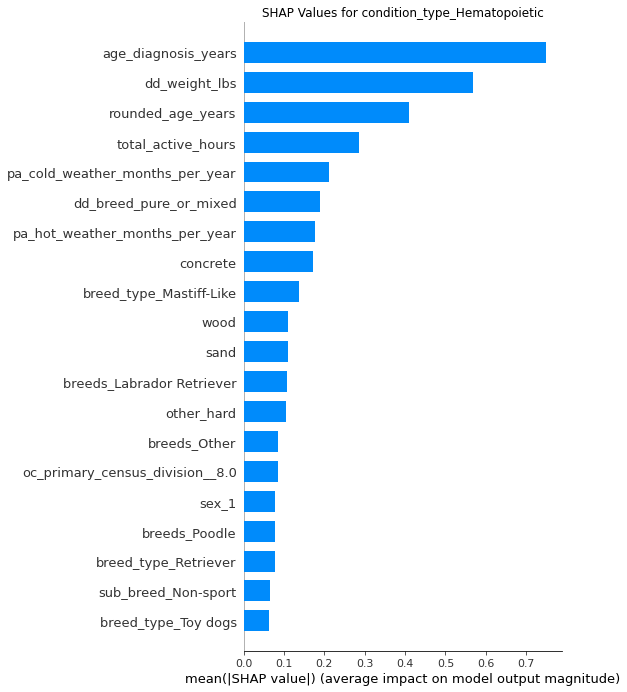

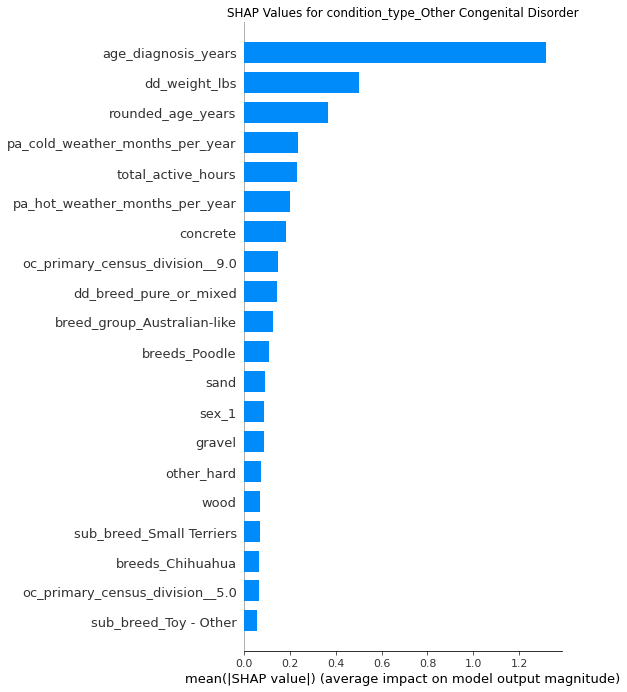

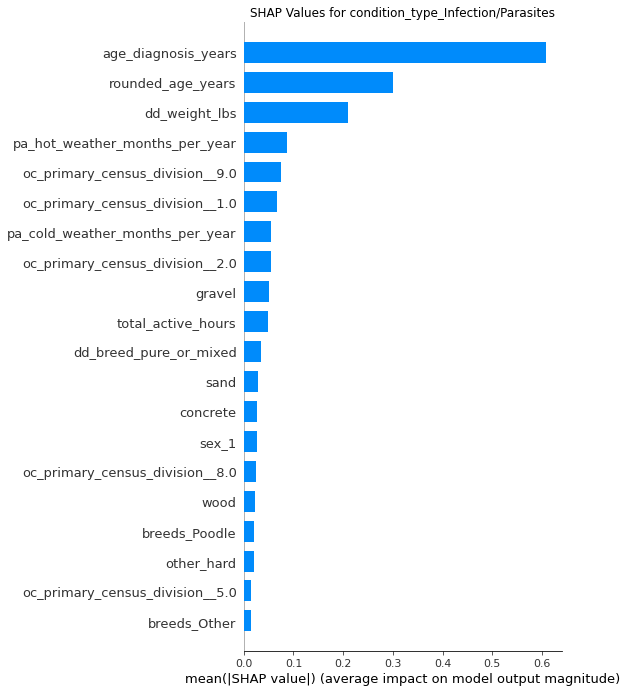

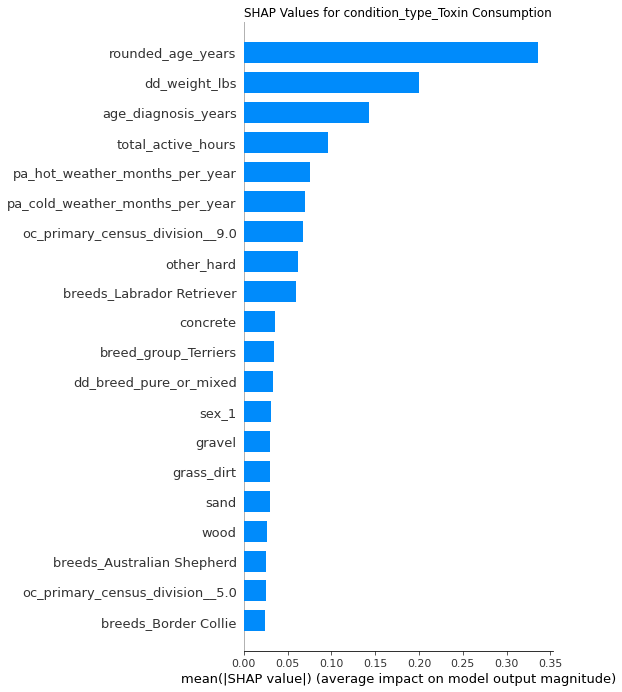

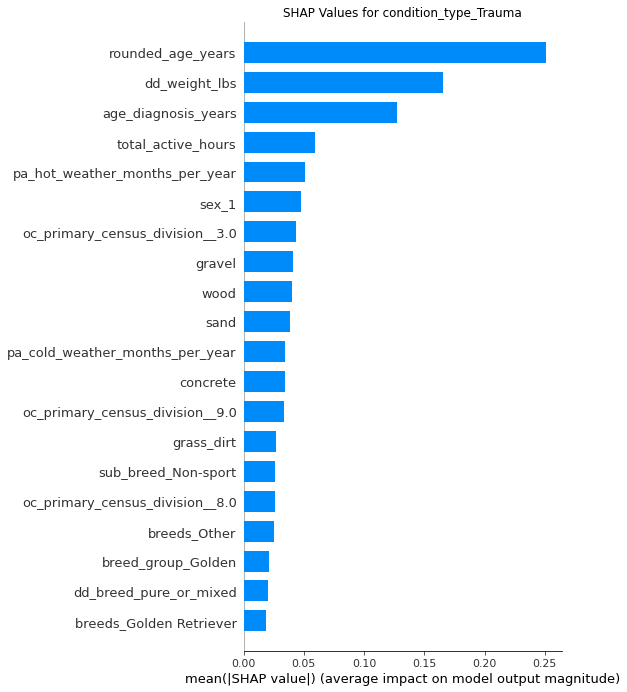

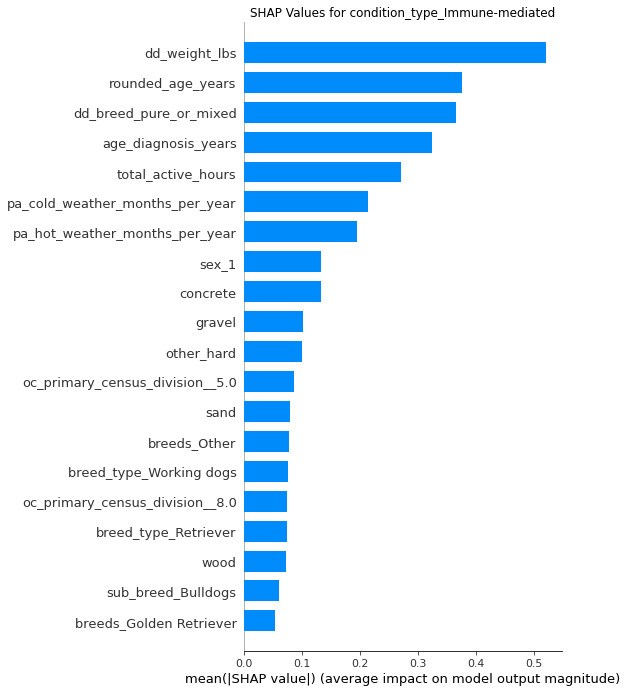

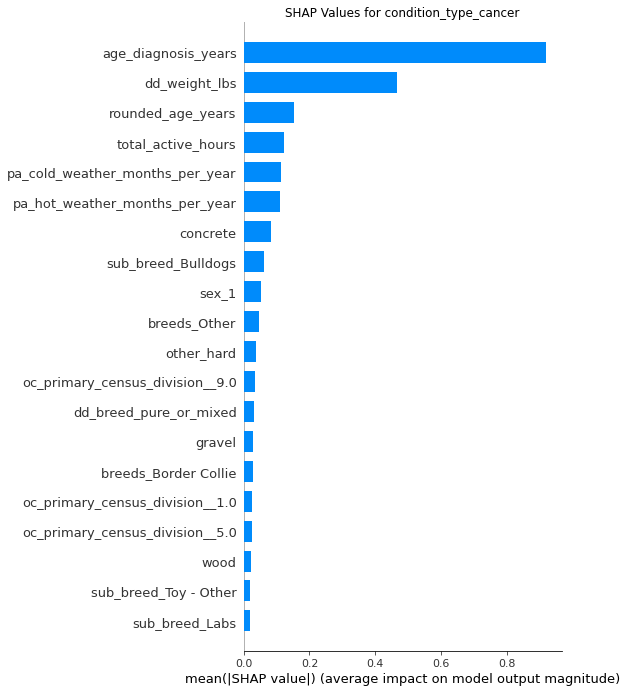

In [14]:
# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialise model
model = xgb.XGBClassifier()

# use OneVsRestClassifier to classify multi label
ovr = OneVsRestClassifier(model)

# train model
ovr.fit(X_train, y_train)

# for each label analyse SHAP individually
for i, label in enumerate(y.columns):
    # get sub model
    sub_model = ovr.estimators_[i]

    # create SHAP explainer
    explainer = shap.Explainer(sub_model)

    # compute SHAP value
    shap_values = explainer(X_train)

    # plot
    plt.figure()
    shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar", show=False)
    plt.title(f"SHAP Values for {label}")
    plt.show()

In [46]:
# loading model
model = joblib.load('../models/extreme_gradient_boosting_v2.joblib')

# explainer = shap.Explainer(model)

# for i, label in enumerate(y_columns):
    # For each label, calculate the SHAP value
    # shap_values = explainer.shap_values(X, y_binary[label])

    # shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    # plt.title(f"SHAP Values for {label}")
    # plt.show()


XGBoostError: [19:18:33] /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/common/json.cc:458: Expecting: """, got: "76 ", around character position: 1
    {L\0\0\0\0\0\0\0
    ^~~~~~~~~
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001368f9d34 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000136926cbe xgboost::JsonReader::Error(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>) const + 1054
  [bt] (2) 3   libxgboost.dylib                    0x0000000136927727 xgboost::JsonReader::Expect(char, char) + 279
  [bt] (3) 4   libxgboost.dylib                    0x0000000136927efb xgboost::JsonReader::ParseObject() + 331
  [bt] (4) 5   libxgboost.dylib                    0x0000000136926767 xgboost::JsonReader::Parse() + 439
  [bt] (5) 6   libxgboost.dylib                    0x000000013692c2be xgboost::Json::Load(xgboost::StringView) + 62
  [bt] (6) 7   libxgboost.dylib                    0x00000001369b13d3 xgboost::LearnerIO::Load(dmlc::Stream*) + 435
  [bt] (7) 8   libxgboost.dylib                    0x000000013690540f XGBoosterUnserializeFromBuffer + 159
  [bt] (8) 9   libffi.7.dylib                      0x000000010b5c1ead ffi_call_unix64 + 85



In [20]:
# separate train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# load the model
model = joblib.load('../models/extreme_gradient_boosting_best_rs_v3.joblib')

# Multi-label classification using OneVsRestClassifier
ovr = OneVsRestClassifier(model)

# train model
ovr.fit(X_train, y_train)

# Perform SHAP analysis on each labeled model individually
for i, label in enumerate(y.columns):
    # obtain sub model
    sub_model = ovr.estimators_[i]

    # create shap explainer
    explainer = shap.Explainer(sub_model)

    # compute shap value
    shap_values = explainer(X_train)

    # plot shap
    plt.figure()
    shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar", show=False)
    plt.title(f"SHAP Values for {label}")
    plt.show()

XGBoostError: [21:52:41] /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/common/json.cc:458: Expecting: """, got: "76 ", around character position: 1
    {L\0\0\0\0\0\0\0
    ^~~~~~~~~
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001359f7d34 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000135a24cbe xgboost::JsonReader::Error(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>) const + 1054
  [bt] (2) 3   libxgboost.dylib                    0x0000000135a25727 xgboost::JsonReader::Expect(char, char) + 279
  [bt] (3) 4   libxgboost.dylib                    0x0000000135a25efb xgboost::JsonReader::ParseObject() + 331
  [bt] (4) 5   libxgboost.dylib                    0x0000000135a24767 xgboost::JsonReader::Parse() + 439
  [bt] (5) 6   libxgboost.dylib                    0x0000000135a2a2be xgboost::Json::Load(xgboost::StringView) + 62
  [bt] (6) 7   libxgboost.dylib                    0x0000000135aaf3d3 xgboost::LearnerIO::Load(dmlc::Stream*) + 435
  [bt] (7) 8   libxgboost.dylib                    0x0000000135a0340f XGBoosterUnserializeFromBuffer + 159
  [bt] (8) 9   libffi.7.dylib                      0x00000001096c1ead ffi_call_unix64 + 85



In [13]:
model = xgb.Booster()
model.load_model('../models/extreme_gradient_boosting_v2.joblib') 

XGBoostError: std::bad_alloc